# 📘 Data Inspection & Verification

## 1. Import & Load Data

In [17]:
import json
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

# Configuration
DATASET_PATH = "/kaggle/input/uit-hwdb/train_line.jsonl" 

def load_jsonl(file_path):
    data = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                data.append(json.loads(line))
        print(f"✅ Successfully loaded {len(data)} samples.")
        return pd.DataFrame(data)
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return pd.DataFrame()

# Load Dataset
df = load_jsonl(DATASET_PATH)

# Preview Data
df.head()

✅ Successfully loaded 7028 samples.


,image,text
0,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_...,Chuyện những người mang số 115. Sáng nay ngồi ...
1,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_...,""" Chú mày biết không, hôm kia không nhờ cấp cứ..."
2,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_...,"Số là trở về nhà sau một chầu nhậu, bị tăng hu..."
3,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_...,bà vợ luống cuống tay chân hét toáng lên. Một ...
4,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_...,xin cấp cứu... Đó chỉ là một trong hàng ngàn t...


## 2. Visual Inspection


--- Sample 1 ---
Path: /kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_line/train_data/165/1.jpg
Label: Bán thuốc giá cao, Công ty Sanofi phải giải trình. Trao đổi với Tuổi Trẻ chiều tối 22 - 3, một

--- Sample 2 ---
Path: /kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_line/train_data/90/7.jpg
Label: bà Lê Thị Vân, nguyên phó chủ tịch UBND TP.HCM, là chủ tịch.

--- Sample 3 ---
Path: /kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_line/train_data/58/30.jpg
Label: quan? Quá trình kết thúc điều tra, lập cáo trạng liên quan đến các bộ phận khác, tôi


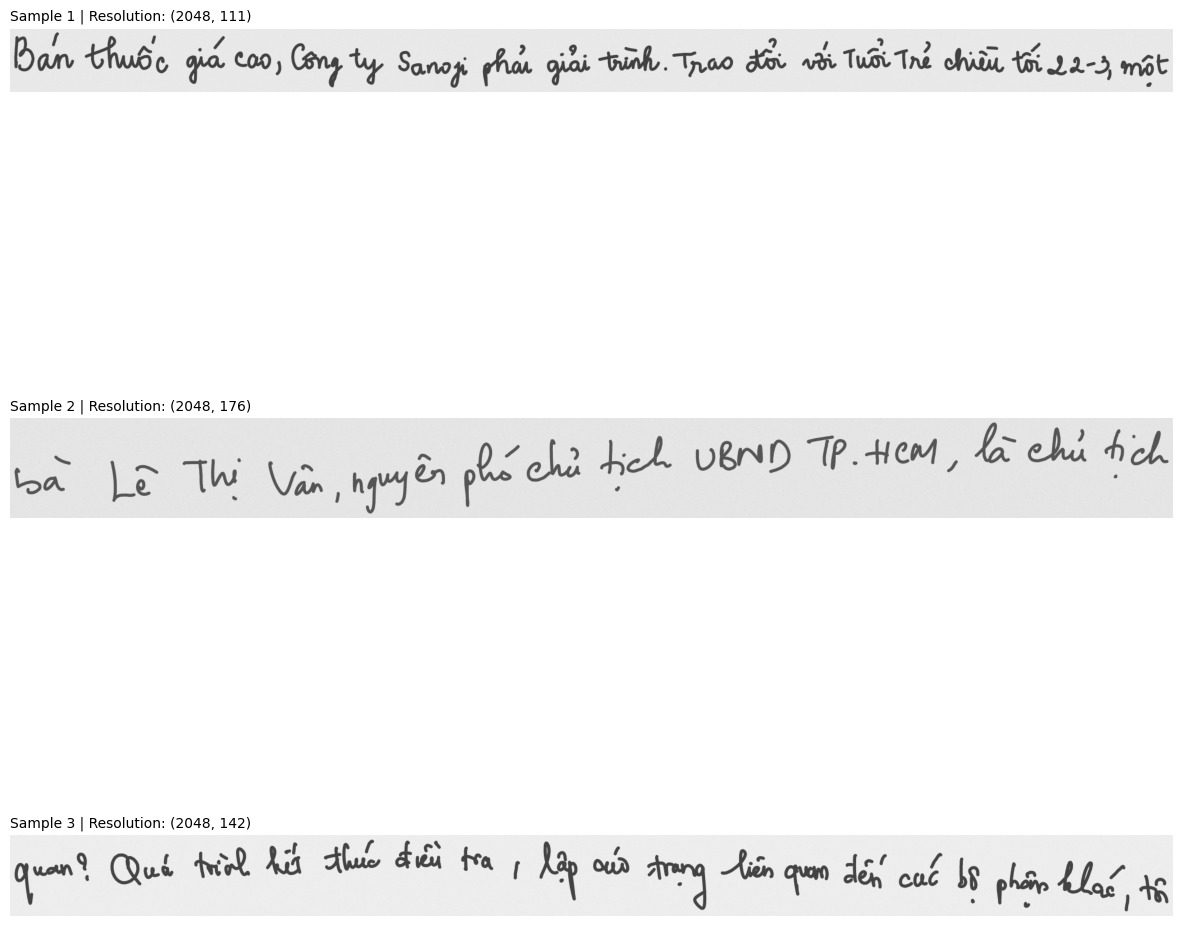

In [22]:
def visualize_samples(df, num_samples=3):
    """
    Randomly display images with their corresponding ground truth text.
    """
    if df.empty:
        print("DataFrame is empty.")
        return

    samples = df.sample(n=min(num_samples, len(df)))
    
    plt.figure(figsize=(15, 5 * num_samples))
    
    for i, (_, row) in enumerate(samples.iterrows()):
        img_path = row['image']
        text = row['text']
        
        try:
            # Open image
            img = Image.open(img_path).convert("RGB")
            
            # Plot
            plt.subplot(num_samples, 1, i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Sample {i+1} | Resolution: {img.size}", loc='left', fontsize=10)
            
            # Display Text clearly below
            print(f"\n--- Sample {i+1} ---")
            print(f"Path: {img_path}")
            print(f"Label: {text}")
            
        except Exception as e:
            print(f"Could not load image: {img_path} - Error: {e}")

    plt.show()

# Run Visualization
visualize_samples(df, num_samples=3)

## 3. Quantitative Analysis

### 3.1 Text Length & Encoding Check

Empty labels found: 0

Total unique characters: 161
Sample characters: đĩũƠơƯưạẢảẤấẦầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏỐốỒồổỗộớờỞởỡợ ...



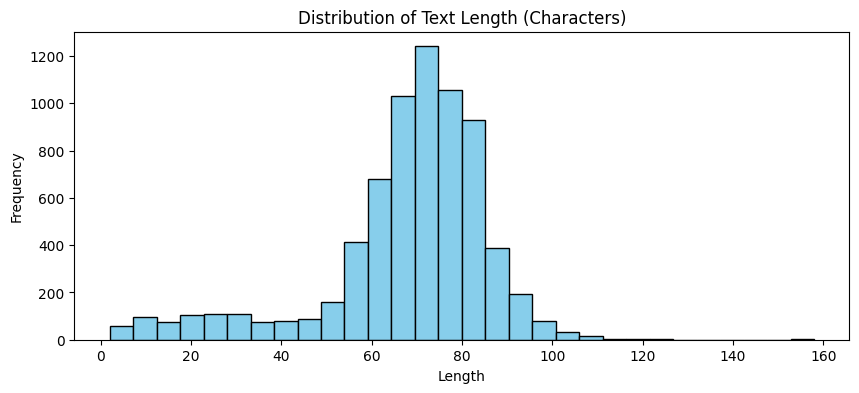

In [19]:
# Check for empty or null text
empty_samples = df[df['text'].str.strip() == '']
print(f"Empty labels found: {len(empty_samples)}")

# Character Distribution (Quick check for rare/garbage characters)
all_text = "".join(df['text'].tolist())
unique_chars = sorted(list(set(all_text)))

print(f"\nTotal unique characters: {len(unique_chars)}")
print(f"Sample characters: {''.join(unique_chars[100:150])} ...\n") # Print a slice to check VN accents

# Histogram of text length
plt.figure(figsize=(10, 4))
df['text_len'] = df['text'].apply(len)
plt.hist(df['text_len'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Text Length (Characters)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

### 3.2 Image Resolution Analysis

Average Width: 2048.0 px
Average Height: 182.9 px


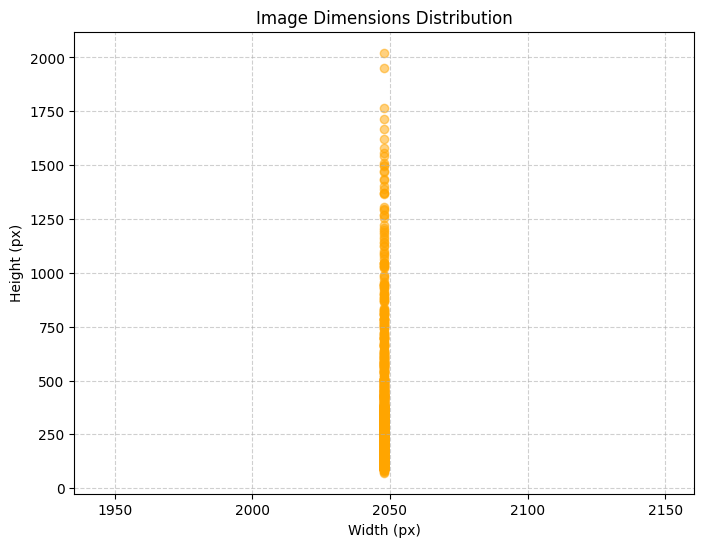

In [21]:
def get_image_size(path):
    try:
        with Image.open(path) as img:
            return img.size # (width, height)
    except:
        return (0, 0)


sample_df = df.copy()
sample_df['size'] = sample_df['image'].apply(get_image_size)
sample_df['width'] = sample_df['size'].apply(lambda x: x[0])
sample_df['height'] = sample_df['size'].apply(lambda x: x[1])

print(f"Average Width: {sample_df['width'].mean():.1f} px")
print(f"Average Height: {sample_df['height'].mean():.1f} px")

# Scatter plot of dimensions
plt.figure(figsize=(8, 6))
plt.scatter(sample_df['width'], sample_df['height'], alpha=0.5, c='orange')
plt.title("Image Dimensions Distribution")
plt.xlabel("Width (px)")
plt.ylabel("Height (px)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 5. Conclusion

Dựa trên các kết quả phân tích định lượng và định tính ở trên, rút ra những nhận xét sau về tập dữ liệu huấn luyện (UIT-HWDB-line):
1. **Tính toàn vẹn của dữ liệu (Data Integrity):**
   - Bộ dữ liệu đảm bảo độ sạch cao với **0 mẫu bị thiếu label**.
   - Trong label (Ground Truth) bao gồm **161 ký tự duy nhất**, bao phủ đầy đủ bảng chữ cái tiếng Việt, bao gồm cả chữ hoa, chữ thường và các tổ hợp dấu thanh phức tạp (ví dụ: đ, ĩ, ũ, ơ, ư, ắ, ệ...). Điều này xác nhận encoding của dữ liệu là UTF-8 chuẩn xác, đáp ứng yêu cầu nhận dạng chữ tiếng Việt.
2. **Đặc điểm hình ảnh:**
   - **Kích thước đã được chuẩn hóa:** Tất cả các ảnh trong tập dữ liệu đều có chiều rộng cố định là 2048 pixel. 
   - **Tỷ lệ khung hình (Aspect Ratio):** Chiều cao trung bình của ảnh là 182.9 pixel, tạo ra tỷ lệ khung hình lớn (~11:1). Đây là đặc trưng điển hình của dữ liệu dạng dòng (line) hoặc đoạn văn bản, phù hợp với đầu vào của kiến trúc Vision Encoder của **DeepSeek-OCR** mà không cần thực hiện cắt nhỏ thêm.

>-> **Quyết định:** Dữ liệu đầu vào đã đạt chuẩn về cả hình ảnh và nhãn văn bản. Do đó, em quyết định sẽ **tiến hành Fine-tuning trực tiếp** mà không cần áp dụng thêm các bước tiền xử lý ảnh khác (như cropping, denoising, v.v.).